## Simulator


In [10]:
from components.agent import Agent
from algorithms.recurse_tree import recursive_build_tree
from algorithms.tpop import TPoP
import pandas as pd


In [14]:
#p_response = whatever comes out of the for loop
#p_claim = one of the three options: True, False or Unverifiable
p_accept = 1
p_reject = 0
p_ignore = 0

p_true = 0.5
p_false = 0.5
p_unverifiable  = 0

p_response = [p_accept, p_reject, p_ignore]
p_claim = [p_true, p_false, p_unverifiable]
#the bounds of the environment
environment_bounds=[[0, 1], [0,1]]

#tree architecture
depth = 2
n_d = [2, 2]

#N = number of agents in the simualtion
N= 20

threshold = 1

#agents_list contains all the agents in the simulation
agents_list = [Agent(p_response=p_response, p_claim=p_claim, environment_bounds=environment_bounds) for _ in range(N)]

#agents_dict contains as keys the agents' positions, and the agent instance as the value. 
agent_dictionary = {(agent.x_position, agent.y_position):agent for agent in agents_list}

In [19]:
from simulation_tools.simulator import simulator
dimensions = [depth, n_d]
p_response = [p_accept, p_reject, p_ignore]
p_claim = [p_true, p_false, p_unverifiable]
agents = [agents_list, agent_dictionary]
df = simulator(p_response, p_claim, dimensions, threshold, agents, N)

In [20]:
df

,p_accept,p_reject,p_ignore,p_true,p_false,p_unverifiable,valid_tree,responses_sum
0,100,0,0,1,0,0,False,NaN
1,100,0,0,1,0,0,False,NaN
2,100,0,0,1,0,0,False,NaN
3,100,0,0,1,0,0,True,6.0
4,100,0,0,1,0,0,True,6.0
5,100,0,0,1,0,0,True,6.0
6,100,0,0,1,0,0,False,NaN
7,100,0,0,1,0,0,True,6.0
8,100,0,0,1,0,0,True,6.0
9,100,0,0,1,0,0,True,6.0


In [ ]:
from algorithms.tpop import classifier
from simulation_tools.results import results

#TODO: pass the classifier through the df that is the output of the simulator
#Correct the results function because the comparison is incorrect

In [26]:
p_true = 1
p_false = 0
p_unverifiable = 0
p_claim = [p_true, p_false, p_unverifiable]
N=100
dfs = []
for p_accept in range(0, 110, 10):

    remainder = 100 - p_accept
    for p_reject in range(0, remainder +10, 10):
        p_ignore = 100-p_reject-p_accept
        p_response = [p_accept, p_reject, p_ignore]
        assert sum(p_response) == 100
        p_response = [p_accept/100, p_reject/100, p_ignore/100]

        #agents_list contains all the agents in the simulation
        agents_list = [Agent(p_response=p_response, p_claim=p_claim, environment_bounds=environment_bounds) for _ in range(N)]

        #agents_dict contains as keys the agents' positions, and the agent instance as the value. 
        agent_dictionary = {(agent.x_position, agent.y_position):agent for agent in agents_list}
        agents = [agents_list, agent_dictionary]
        df = simulator(p_response , p_claim, dimensions, threshold, agents, N)
        
        dfs.append(df)     
combined_df = pd.concat(dfs)
print(combined_df)




    p_accept  p_reject  p_ignore  p_true  p_false  p_unverifiable  valid_tree  \
0        0.0       0.0       1.0       1        0               0        True   
1        0.0       0.0       1.0       1        0               0        True   
2        0.0       0.0       1.0       1        0               0        True   
3        0.0       0.0       1.0       1        0               0        True   
4        0.0       0.0       1.0       1        0               0        True   
..       ...       ...       ...     ...      ...             ...         ...   
95       1.0       0.0       0.0       1        0               0        True   
96       1.0       0.0       0.0       1        0               0       False   
97       1.0       0.0       0.0       1        0               0        True   
98       1.0       0.0       0.0       1        0               0        True   
99       1.0       0.0       0.0       1        0               0        True   

    responses_sum  
0      

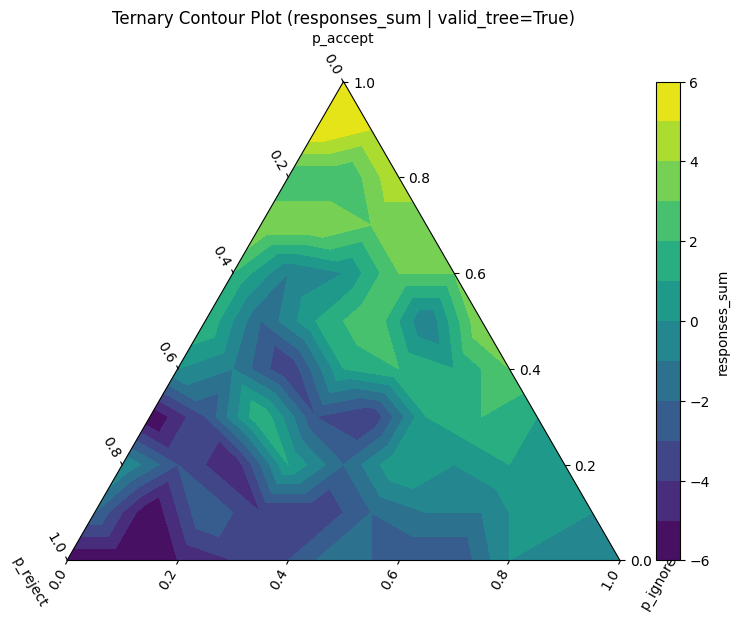

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading CSV
df = pd.read_csv("/Users/amm3117/Desktop/TPoP 3/Code/tree-consensus/tree-consensus-algoritms/agent-based-simulations/n200_combined_df.csv")  # Update path as needed

# Filter valid trees and drop NaNs
filtered_df = df[df["valid_tree"] == True].copy()
filtered_df = filtered_df.dropna(subset=["responses_sum"])

# Extract values
a = filtered_df["p_accept"].values
b = filtered_df["p_reject"].values
c = filtered_df["p_ignore"].values
z = filtered_df["responses_sum"].values

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='ternary')

t = ax.tricontourf(a, b, c, z, levels=12, cmap="viridis")

ax.set_tlabel("p_accept")
ax.set_llabel("p_reject")
ax.set_rlabel("p_ignore")
ax.set_title("Ternary Contour Plot (responses_sum | valid_tree=True)")

fig.colorbar(t, ax=ax, label="responses_sum")
plt.tight_layout()
plt.show()
